Epoch 0, Loss: 0.2580702304840088
Epoch 1000, Loss: 0.04524688422679901
Epoch 2000, Loss: 0.018570413812994957
Epoch 3000, Loss: 0.010636045597493649
Epoch 4000, Loss: 0.0044204965233802795
Epoch 5000, Loss: 0.0023988971952348948
Epoch 6000, Loss: 0.001560972654260695
Epoch 7000, Loss: 0.0011467672884464264
Epoch 8000, Loss: 0.0008706183871254325
Epoch 9000, Loss: 0.0006137695745564997


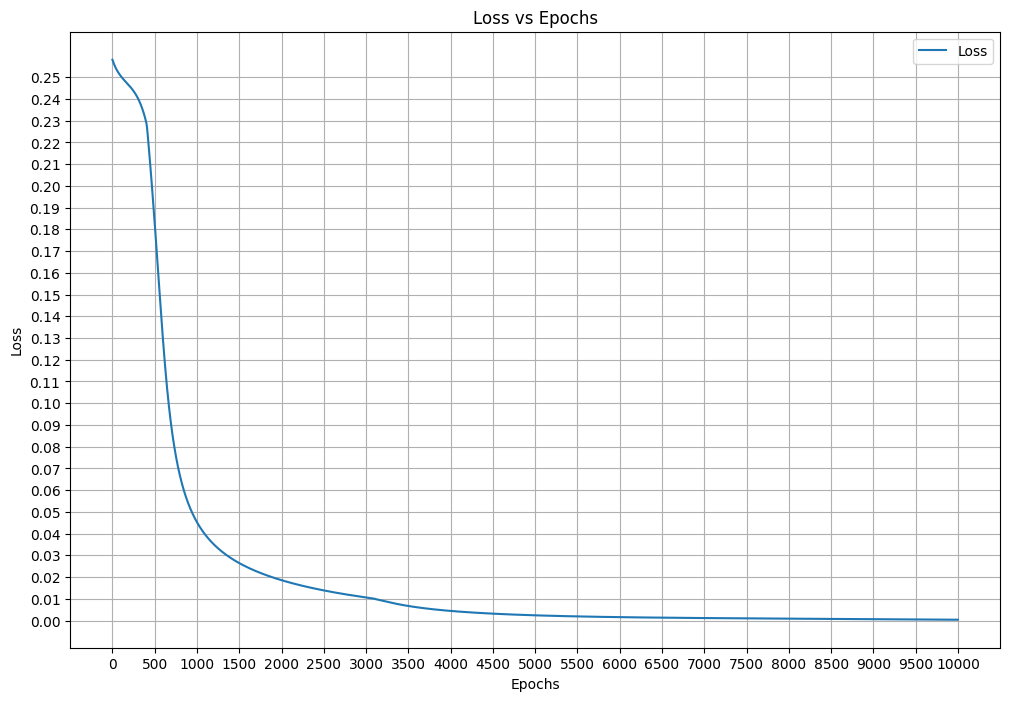

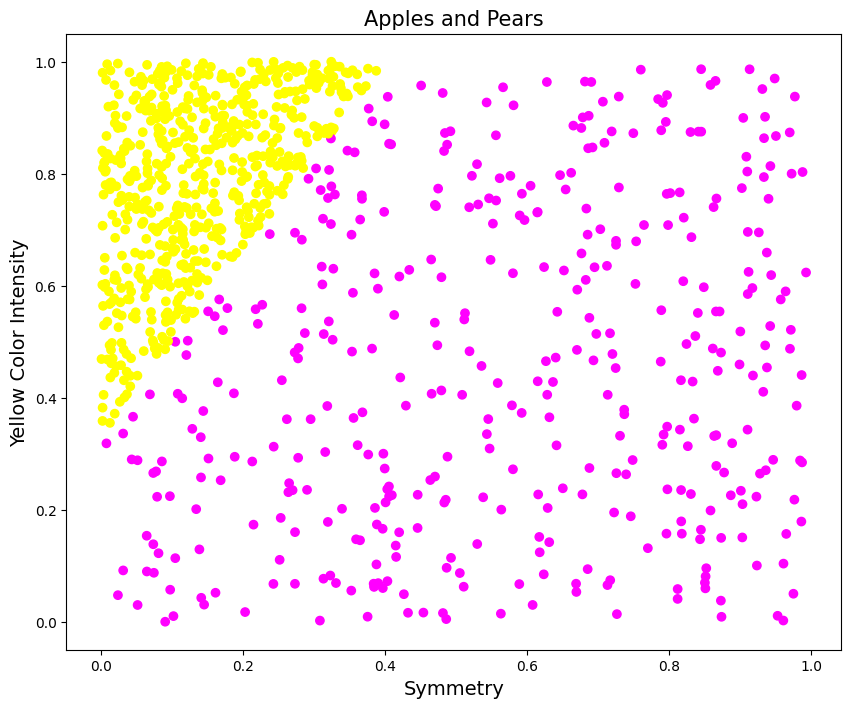

In [16]:
import torch
import numpy as np
from torch.nn import Linear, ReLU, Sigmoid
from torch import optim, nn
from matplotlib import pyplot as plt
import pandas as pd

# Load data from the web
data = pd.read_csv("https://skillsmart.ru/data/apples_pears.csv")

# Data preparation
X = torch.FloatTensor(data.iloc[:, :2].values)  # matrix (two features)
y = torch.FloatTensor(data['target'].values.reshape((-1, 1)))  # reshape to one dimension

# Initialize device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Training step function
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

# Improved model with additional layers and ReLU activation function
neuron = torch.nn.Sequential(
    Linear(2, 4),
    ReLU(),
    Linear(4, 4),
    ReLU(),
    Linear(4, 1),
    Sigmoid()
)

# Training parameters
lr = 0.001  # Reduced learning rate
n_epochs = 10000
loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(neuron.parameters(), lr=lr)  # Using Adam optimizer
train_step = make_train_step(neuron, loss_fn, optimizer)

# Train the model and record loss values
losses = []
for epoch in range(n_epochs):
    loss = train_step(X, y)
    losses.append(loss)
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Plot loss over epochs with more detailed axis ticks
plt.figure(figsize=(12, 8))
plt.plot(range(n_epochs), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0, n_epochs + 1, 500))
plt.yticks(np.arange(0, max(losses), 0.01))
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Predictions and visualization of results
neuro_data = neuron(X)
y2 = neuro_data > 0.5
y2 = y2.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 1], data.iloc[:, 0], c=y2, cmap='spring')
plt.title('Apples and Pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellow Color Intensity', fontsize=14)
plt.show()


We used the Adam Optimizer, which adjusts learning rates during training, helping our model converge faster and handle large datasets more effectively.

ReLU activation function was also used to speed up training by avoiding the vanishing gradient problem, it "helps" our model to learn complex things better.

Besides that several new layers should help us improve accuracy.